<a href="https://colab.research.google.com/github/Afsaumutoniwase/Farmsmart_model_training_and_evaluation/blob/main/Summative_Intro_to_ml_Afsa%20Umutoniwase_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo



## Optimization Techniques in Machine Learning – FarmSmart leaf health classifier

This notebook implements binary image classification for hydroponically grown plants, predicting leaf health (healthy vs unhealthy) using CNN models. The goal is to explore the impact of optimization and regularization techniques on model performance, efficiency, and convergence.



# Case Study and Implementation




In [9]:
#Import Necessary Libraries
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Farmsmart_model_training_and_evaluation/Dataset_HydroFarm'
os.makedirs('saved_models', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [11]:
img_size = (240, 240)
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir + '/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir + '/validation',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir + '/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 371 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [12]:
def define_model(optimizer_name='adam',
                 regularization_type=None,
                 early_stopping=False,
                 dropout=0.0,
                 learning_rate=0.001,
                 epochs=10,
                 train_data=None,
                 val_data=None,
                 model_name='model'):

    # Define regularizer
    regularizer = None
    if regularization_type == 'l1':
        regularizer = l1(0.01)
    elif regularization_type == 'l2':
        regularizer = l2(0.01)

    # Choose optimizer
    if optimizer_name.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam' or 'rmsprop'.")

    # Build model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3), kernel_regularizer=regularizer))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))

    if dropout > 0:
        model.add(Dropout(dropout))

    model.add(Dense(1, activation='sigmoid'))

    num_layers = len(model.layers)

    # Compile model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Callbacks
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True))

    # Train model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=callbacks
    )
    config = {
        'model_name': model_name,
        'optimizer_name': optimizer_name,
        'regularization_type': regularization_type,
        'early_stopping': early_stopping,
        'dropout': dropout,
        'learning_rate': learning_rate,
        'epochs_planned': epochs,
        'epochs_trained': len(history.history['loss']),
        'num_layers': num_layers,
        'history': history.history
    }

    return model, history, config

In [15]:
model1, history1,config1 = define_model(
    optimizer_name='adam',
    regularization_type= None,
    early_stopping=True,
    dropout=0,
    learning_rate=0.0005,
    epochs=10,
    train_data=train_gen,
    val_data=val_gen,
    model_name='model1'
)
model1.save('saved_models/model1_baseline.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.5522 - loss: 2.7348 - val_accuracy: 0.5000 - val_loss: 0.8982
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7193 - loss: 0.5769 - val_accuracy: 0.8415 - val_loss: 0.4566
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9198 - loss: 0.3373 - val_accuracy: 0.8415 - val_loss: 0.3932
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.9440 - loss: 0.1742 - val_accuracy: 0.9634 - val_loss: 0.1630
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.9918 - loss: 0.0636 - val_accuracy: 0.9634 - val_loss: 0.1025
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 1.0000 - loss: 0.0263 - val_accuracy: 0.9756 - val_loss: 0.1197
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.9756 - val_loss: 0.1559
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.9756 - val_loss:

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [17]:
def loss_curve_plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [28]:
def evaluate_model(model, test_gen, config=None):
  # Reset test generator to ensure proper ordering
  test_gen.reset()

  # Get predictions
  preds = model.predict(test_gen, verbose=0)
  y_pred = np.round(preds).astype(int)
  y_true = test_gen.classes

  # Calculate all metrics
  metrics = {
      'Model Name': config.get('model_name', 'unnamed_model'),
      'Optimizer': config.get('optimizer_name', 'N/A'),
      'Regularizer': config.get('regularization_type', 'None'),
      'Early Stopping': 'Yes' if config.get('early_stopping', False) else 'No',
      'Learning Rate': config.get('learning_rate', 'N/A'),
      'Epochs Planned': config.get('epochs_planned', 'N/A'),
      'Epochs Trained': config.get('epochs_trained', 'N/A'),
      'Num Layers': config.get('num_layers', 'N/A'),
      'Dropout': config.get('dropout', 0),
      'Accuracy': accuracy_score(y_true, y_pred),
      'Precision': precision_score(y_true, y_pred),
      'Recall': recall_score(y_true, y_pred),
      'F1 Score': f1_score(y_true, y_pred),
      'Training Accuracy': config.get('history', {}).get('accuracy', [None])[-1],
      'Validation Accuracy': config.get('history', {}).get('val_accuracy', [None])[-1],
      'Training Loss': config.get('history', {}).get('loss', [None])[-1],
      'Validation Loss': config.get('history', {}).get('val_loss', [None])[-1]
  }

  # Print classification report
  print(f"\n=== Evaluation Metrics for {metrics['Model Name']} ===")
  print("\nClassification Report:\n", classification_report(y_true, y_pred))
  print("\nDetailed Metrics:")
  for k, v in metrics.items():
      if isinstance(v, float):
          print(f"{k}: {v:.4f}")
      else:
          print(f"{k}: {v}")

  # Plot confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Unhealthy', 'Healthy'],
              yticklabels=['Unhealthy', 'Healthy'])
  plt.title(f"Confusion Matrix - {metrics['Model Name']}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  return None

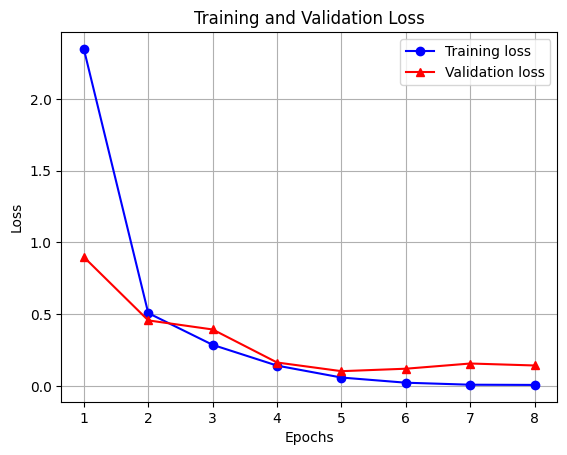

In [19]:
loss_curve_plot(history1)


=== Evaluation Metrics for model1 ===

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.93      1.00      0.96        39

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77


Detailed Metrics:
Model Name: model1
Optimizer: adam
Regularizer: None
Early Stopping: Yes
Learning Rate: 0.0005
Epochs Planned: 10
Epochs Trained: 8
Num Layers: 7
Dropout: 0
Accuracy: 0.9610
Precision: 0.9286
Recall: 1.0000
F1 Score: 0.9630
Training Accuracy: 1.0000
Validation Accuracy: 0.9756
Training Loss: 0.0067
Validation Loss: 0.1422


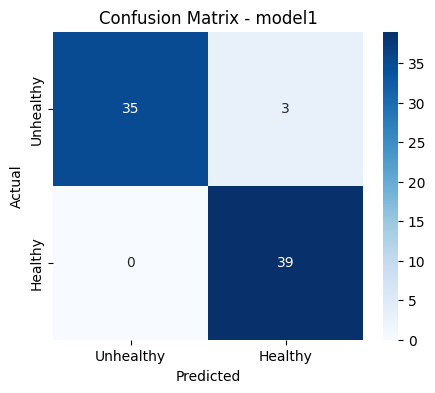

In [29]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score

evaluate_model(model1, test_gen, config1)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.5483 - loss: 2.9937 - val_accuracy: 0.5610 - val_loss: 0.6731
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6824 - loss: 0.6291 - val_accuracy: 0.8049 - val_loss: 0.5164
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8373 - loss: 0.4327 - val_accuracy: 0.8171 - val_loss: 0.3370
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9055 - loss: 0.2234 - val_accuracy: 0.9512 - val_loss: 0.1802
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9656 - loss: 0.1114 - val_accuracy: 0.9756 - val_loss: 0.0803
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9909 - loss: 0.0330 - val_accuracy: 0.9756 - val_loss: 0.1902
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 0.0268 - val_accuracy: 0.9878 - val_loss: 0.0771
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9996 - loss: 0.0234 - val_accuracy: 0.9512 - val_loss:

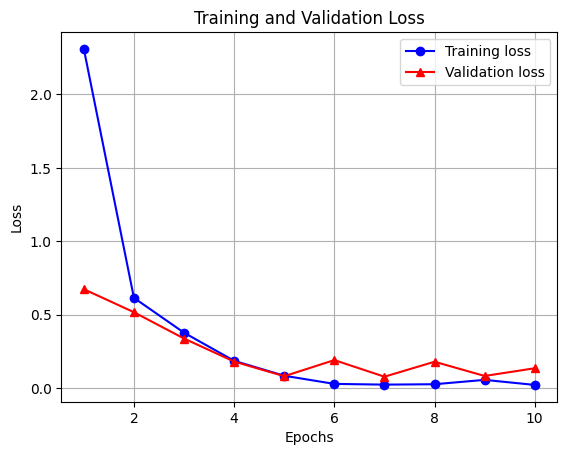


=== Evaluation Metrics for model2 ===

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.91      1.00      0.95        39

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77


Detailed Metrics:
Model Name: model2
Optimizer: adam
Regularizer: <class 'keras.src.layers.regularization.dropout.Dropout'>
Early Stopping: Yes
Learning Rate: 0.0010
Epochs Planned: 10
Epochs Trained: 10
Num Layers: 8
Dropout: 0.3000
Accuracy: 0.9481
Precision: 0.9070
Recall: 1.0000
F1 Score: 0.9512
Training Accuracy: 0.9973
Validation Accuracy: 0.9756
Training Loss: 0.0211
Validation Loss: 0.1346


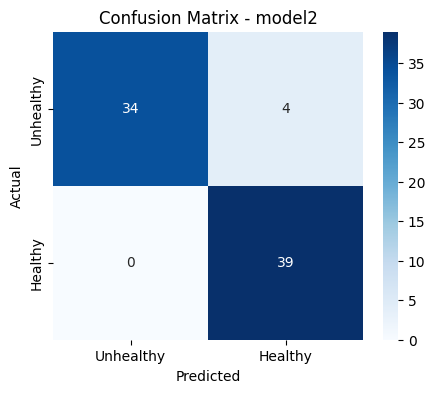

In [33]:
model2, history2, config2 = define_model(
    optimizer_name='adam',
    regularization_type= Dropout,
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.001,
    epochs=10,
    train_data=train_gen,
    val_data=val_gen,
    model_name='model2'
)
model2.save('saved_models/model2_adam&dropout.h5')

loss_curve_plot(history2)
evaluate_model(model2, test_gen, config2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.5018 - loss: 9.0959 - val_accuracy: 0.5000 - val_loss: 2.5270
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5492 - loss: 2.3272 - val_accuracy: 0.5610 - val_loss: 1.8103
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.7008 - loss: 1.6423 - val_accuracy: 0.5732 - val_loss: 1.4295
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6592 - loss: 1.3438 - val_accuracy: 0.6220 - val_loss: 1.2497
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.7105 - loss: 1.0664 - val_accuracy: 0.7561 - val_loss: 1.0504
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7629 - loss: 0.9640 - val_accuracy: 0.8049 - val_loss: 0.8703
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8113 - loss: 0.8469 - val_accuracy: 0.7683 - val_loss: 0.8209
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8170 - loss: 0.7804 - val_accuracy: 0.7805 - val_loss:

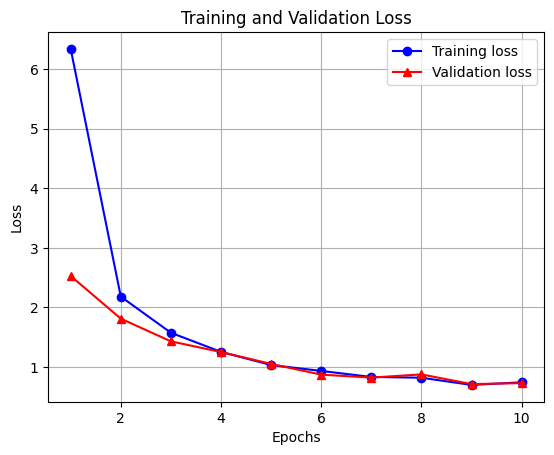


=== Evaluation Metrics for model3 ===

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        38
           1       0.75      0.92      0.83        39

    accuracy                           0.81        77
   macro avg       0.82      0.80      0.80        77
weighted avg       0.82      0.81      0.80        77


Detailed Metrics:
Model Name: model3
Optimizer: rmsprop
Regularizer: l2
Early Stopping: Yes
Learning Rate: 0.0005
Epochs Planned: 10
Epochs Trained: 10
Num Layers: 7
Dropout: 0
Accuracy: 0.8052
Precision: 0.7500
Recall: 0.9231
F1 Score: 0.8276
Training Accuracy: 0.8194
Validation Accuracy: 0.8293
Training Loss: 0.7418
Validation Loss: 0.7284


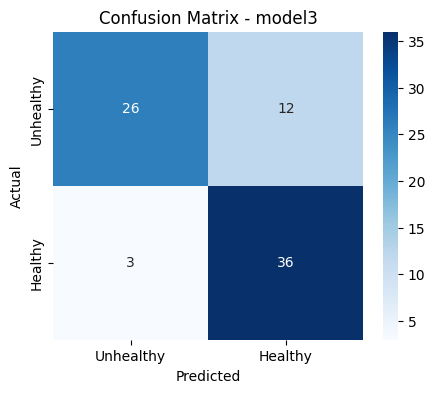

In [31]:
model3, history3, config3 = define_model(
    optimizer_name='rmsprop',
    regularization_type='l2',
    early_stopping=True,
    dropout=0,
    learning_rate=0.0005,
    epochs=10,
    train_data=train_gen,
    val_data=val_gen,
    model_name='model3'
)

loss_curve_plot(history3)
evaluate_model(model3, test_gen, config3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5519 - loss: 3.7442 - val_accuracy: 0.6463 - val_loss: 2.6823
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.6358 - loss: 2.5189 - val_accuracy: 0.8049 - val_loss: 1.9976
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7280 - loss: 1.9255 - val_accuracy: 0.5244 - val_loss: 1.7336
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7554 - loss: 1.5943 - val_accuracy: 0.8171 - val_loss: 1.4448
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8163 - loss: 1.3872 - val_accuracy: 0.8293 - val_loss: 1.3091
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8033 - loss: 1.2948 - val_accuracy: 0.8049 - val_loss: 1.2342
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8027 - loss: 1.2266 - val_accuracy: 0.8049 - val_loss: 1.1856
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.8646 - loss: 1.1117 - val_accuracy: 0.7927 - val_loss:

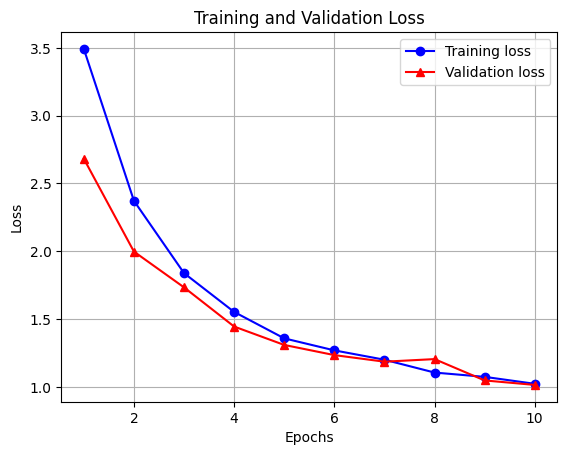


=== Evaluation Metrics for model4 ===

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89        38
           1       0.84      0.97      0.90        39

    accuracy                           0.90        77
   macro avg       0.91      0.90      0.90        77
weighted avg       0.91      0.90      0.90        77


Detailed Metrics:
Model Name: model4
Optimizer: adam
Regularizer: l2
Early Stopping: Yes
Learning Rate: 0.0001
Epochs Planned: 10
Epochs Trained: 10
Num Layers: 8
Dropout: 0.5000
Accuracy: 0.8961
Precision: 0.8444
Recall: 0.9744
F1 Score: 0.9048
Training Accuracy: 0.8922
Validation Accuracy: 0.8902
Training Loss: 1.0226
Validation Loss: 1.0143


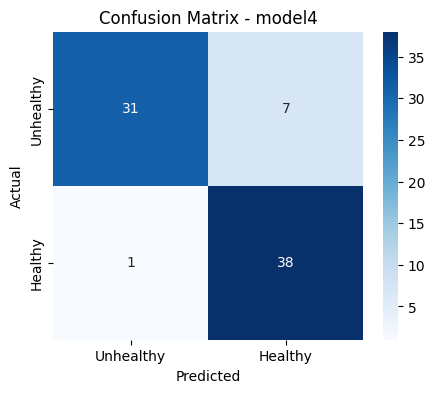

In [32]:
model4, history4, config4 = define_model(
    optimizer_name='adam',
    regularization_type='l2',
    early_stopping=True,
    dropout=0.5,
    learning_rate=0.0001,
    epochs=10,
    train_data=train_gen,
    val_data=val_gen,
    model_name='model4'
)

loss_curve_plot(history4)
evaluate_model(model4, test_gen, config4)

Found 371 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 229s 19s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 13s/step

Accuracy: 0.9610 | F1-Score: 0.9620

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.95      0.97      0.96        39

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



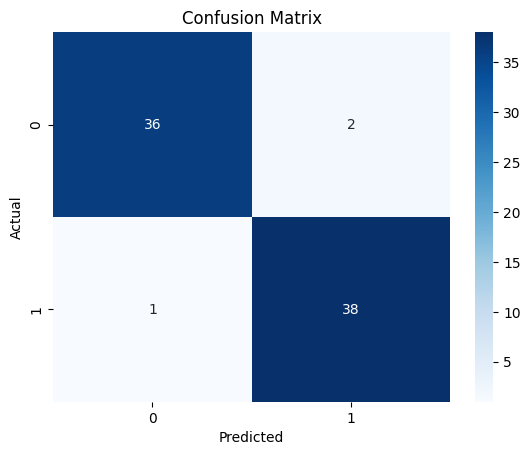

✅ Model saved as 'saved_models/model5_vgg16.h5'


In [38]:
#Data Preparation
img_size = (240, 240)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen_lg = datagen.flow_from_directory(
    data_dir + '/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_gen_lg = datagen.flow_from_directory(
    data_dir + '/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

#Feature Extraction Using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(generator):
    features = model.predict(generator, verbose=1)
    features_flattened = features.reshape(features.shape[0], -1)
    labels = generator.classes
    return features_flattened, labels

X_train, y_train = extract_features(train_gen_lg)
X_test, y_test = extract_features(test_gen_lg)

#Train Logistic Regression
clf = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear')  # You can tune `C` and `solver`
clf.fit(X_train, y_train)

#Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f} | F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Save Model
joblib.dump(clf, 'saved_models/model5_vgg16.h5')
print("✅ Model saved as 'saved_models/model5_vgg16.h5'")


In [41]:
model1.save('saved_models/model1_baseline.h5')
model2.save('saved_models/model2_adam&dropout.h5')
model3.save('saved_models/model3_rmsprop&l2.h5')
model4.save('saved_models/model4_adam&l2.h5')
model5.save('saved_models/model5_vgg16.h5')

NameError: name 'model5' is not defined

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [40]:
model1 = load_model('saved_models/model1_baseline.h5')
model2 = load_model('saved_models/model2_adam&dropout.h5')
model3 = load_model('saved_models/model3_rmsprop&l2.h5')
model4 = load_model('saved_models/model4_adam&l2.h5')
model5 = load_model('saved_models/model5_vgg16.h5')

def evaluate_best_model(model, test_data):
    loss, accuracy = model.evaluate(test_data)
    print(f"Accuracy: {accuracy:.4f} | Loss: {loss:.4f}")
    return accuracy, loss

results = {}
results['model1'] = evaluate_best_model(model1, test_gen)
results['model2'] = evaluate_best_model(model2, test_gen)
results['model3'] = evaluate_best_model(model3, test_gen)
results['model4'] = evaluate_best_model(model4, test_gen)
results['model5'] = evaluate_best_model(model5, test_gen_lg)

best_model_name = max(results, key=lambda k: results[k][0])
print(f"\n Best Performing Model: {best_model_name} with Accuracy = {results[best_model_name][0]:.4f}")


OSError: Unable to synchronously open file (file signature not found)

In [ ]:
probs = model1.predict(test_gen)
print(probs[:10])  # Should show floats like 0.23, 0.78 etc.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step
[[0.0203288 ]
 [0.00427722]
 [0.01887674]
 [0.00935479]
 [0.19028567]
 [0.19028567]
 [0.01228261]
 [0.01228261]
 [0.00739058]
 [0.01085763]]


In [ ]:

def make_predictions(model_path, X):
    # Load the model from the specified path
    model = load_model(model_path)

    # Make predictions (probabilities between 0 and 1)
    probs = model.predict(X)

    # Convert probabilities to binary class labels (0 or 1)
    predictions = (probs > 0.2).astype(int)
    return predictions

best_model_path = 'saved_models/model1_baseline.h5'
preds = make_predictions(best_model_path, test_gen)
test_labels = test_gen.classes
print("Unhealthy:", sum(test_labels == 0), "Healthy:", sum(test_labels == 1))

# View some results
print(preds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
Unhealthy: 38 Healthy: 39
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Congratulations!!
